## Imports

In [1]:
from ipynb.fs.full.Jacobian import *

import numpy as np
from numpy import linalg as LA
import sympy as sp

import matplotlib.pyplot as plt
import math

## Global Variables

In [2]:
#Time variables
interval = 10
delta = 0.1

#Number represent how far we want to be precised.
Epsilon = 10**-2

## Main Program

In [3]:
def create_f(uk_1, expr):
    return (u - uk_1)/delta - expr

In [4]:
def FirstModel(expr, u0):
    t0 = 0
    i = 1
    f_uk = 1
    uk_1 = 1
    
    #Each list is an axis.
    #Time = [t0, t1, t2, ...., tn]
    #Function = [u0, u1, u2, ...., un]
    function = [u0]
    time = [t0]
    
    first = True
    
    #Loop for the time
    while(t0 < interval):
        t0 += delta
        
        #Newton's method
        while(f_uk > Epsilon):
            
            f_uk_1 = 0
            f_uk_1_prime = 0
            
            # First step, we change our equation to f(x) = 0
            f = create_f(uk_1, expr)
            
            # We recup the term f(uk-1)
            if(first):
                f_uk_1 = f.subs(u, uk_1)
                first = False
            
            else:
                f_uk_1 = f.subs(u, res[i-1])
                
            #We recup the term f'(uk_1)
            f_uk_1_prime = Jacobian_one(f).subs(u, uk_1)
            
            #Formula : uk = uk_1 - (f(uk_1) / f'(uk_1))
            uk = uk_1 - (f_uk_1 / f_uk_1_prime)
            
            #Check the approximation. If f_uk < Epsilon = good approximation
            f_uk = f.subs(u, uk)
            uk_1 = uk
        
        #Update our 2 lists and indexes.
        time.append(t0)
        function.append(uk)
        f_uk = 1
        i += 1
    
    #Creation of our final list containing tuples like that: (time, function)
    final_points = []
    for i in range(len(res)):
        final_points.append([time[i], function[i]])
        
    return final_points

## Unitary tests
### Tests with only one equation.

### exp(-x)

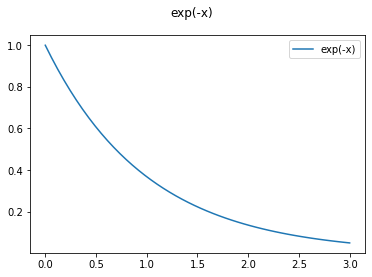

NameError: name 't' is not defined

In [5]:
fig, ax = plt.subplots()
x = np.linspace(0, 3, 50)
y = np.exp(-x)
ax.plot(x, y, label ='exp(-x)')
plt.legend()  
plt.suptitle('exp(-x)')
plt.show()

res = FirstModel(-u, 1)

absi = []
for i in range(0, len(res)):
    absi.append(res[i][0])
coords = []
for j in range(0, len(res)):
    coords.append(res[j][1])
plt.ylim([0, 1])
plt.title('Approximation de exp(-x)')
plt.xlim([0, 3])
plt.scatter(absi, coords)

### exp(x)

In [ ]:
fig, ax = plt.subplots()
x = np.linspace(0, 3, 50)
y = np.exp(x)
ax.plot(x, y, label ='exp(x)')
plt.legend()  
plt.suptitle('exp(x)')
plt.show()

res = FirstModel(u, 1)


absi = []
for i in range(0, len(res)):
    absi.append(res[i][0])
coords = []
for j in range(0, len(res)):
    coords.append(res[j][1])
plt.ylim([1, 20])
plt.title('Approximation de exp(x)')
plt.xlim([0, 3])
plt.scatter(absi, coords)
